In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('height-weight.csv')

In [4]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


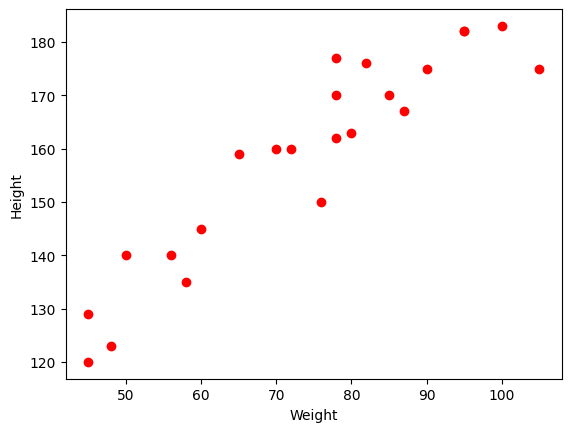

In [5]:
## Scatter plot
plt.scatter(df['Weight'], df['Height'], color = 'red')
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show()

In [6]:
## Correlation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


In [7]:
## Seaborn for visualization
import seaborn as sns

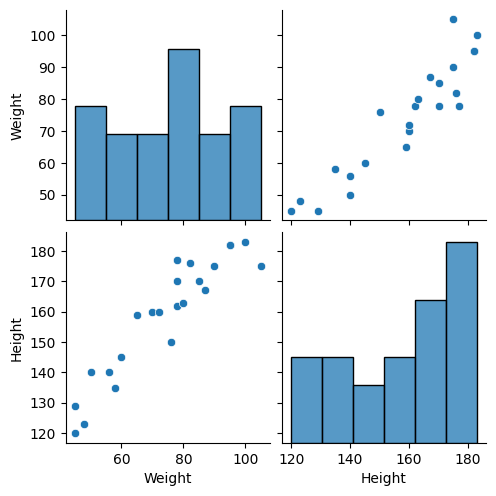

In [8]:
sns.pairplot(df)

In [9]:
## Independent and depedent fetures

df.head()
X = df[['Weight']]  ## Indenpendent feture should be data frame of 2D array
y = df['Height']    ## This can bbe in series or 1D array

In [10]:
X_series = df['Weight']
np.array(X_series).shape

(23,)

In [11]:
np.array(y).shape

(23,)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [15]:
X_train.shape

(17, 1)

In [16]:
## Standarization

from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [18]:
X_test = scaler.transform(X_test)

In [19]:
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [20]:
## Apply Simple Linear Regression

from sklearn.linear_model import LinearRegression

In [21]:
regression = LinearRegression()

In [22]:
regression.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [23]:
print("Coefficent or slope: ", regression.coef_)
print("Intercept: ", regression.intercept_)

Coefficent or slope:  [17.2982057]
Intercept:  156.47058823529412


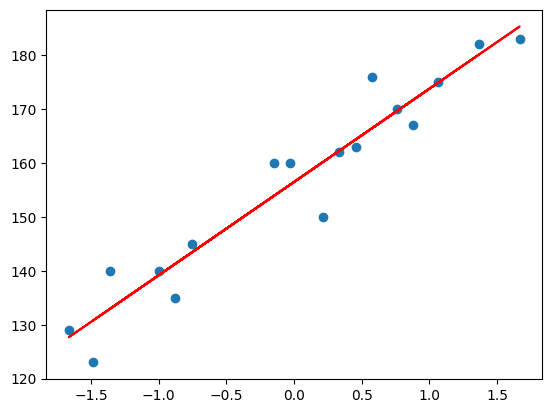

In [24]:
## Plot training data best fit line
plt.scatter(X_train, y_train)
plt.plot(X_train, regression.predict(X_train), color = 'red')
plt.show()

### prediction of train data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_train =65.4364 + 1.26(X_train)
          
### prediction of test data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_test =65.4364 + 1.26(X_test)

In [25]:
## Prediction for test data

y_prediction = regression.predict(X_test)

In [26]:
## Perfomance Metrics

from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error

In [27]:
mse = mean_squared_error(y_test, y_prediction)
mae = mean_absolute_error(y_test, y_prediction)
rmse = root_mean_squared_error(y_test, y_prediction)
print(mse)
print(mae)
print(rmse)

114.84069295228699
9.66512588679501
10.716374991212605


## R square 
Formula

**R^2 = 1 - SSR/SST**


R^2	=	coefficient of determination
SSR	=	sum of squares of residuals
SST	=	total sum of squares

In [28]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_prediction)
print(score)

0.7360826717981276


**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

R2: The R2 of the model
n: The number of observations
k: The number of predictor variables

In [29]:
## Display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6701033397476595

In [30]:
## OSL Linear Regresiion

import statsmodels.api as sm

In [31]:
model = sm.OLS(y_train, X_train).fit()

In [32]:
prediction = model.predict(X_test)
print(prediction)

[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]


In [33]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Mon, 11 Aug 2025   Prob (F-statistic):                       0.664
Time:                        20:28:14   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\Machine Learning\venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [34]:
## Predicition For new Data

regression.predict(scaler.transform([[78]]))

c:\Machine Learning\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([162.26499721])